In [1]:
import pandas as pd
import numpy as np

In [2]:
index_properties = pd.read_csv("Merge_properties.csv", low_memory=False)

In [3]:
index_properties['pos_rank'] = 2
index_properties.loc[index_properties.pos == 'NN' , 'pos_rank'] = 14
index_properties.loc[index_properties.pos == 'JJ' , 'pos_rank' ] = 7
index_properties.loc[index_properties.pos == 'NNS' , 'pos_rank'] = 6
index_properties.loc[index_properties.pos == 'NNP' , 'pos_rank' ] = 6
index_properties.loc[index_properties.pos == 'VBP' , 'pos_rank' ] = 3

In [4]:
index_properties.head()

,word,n_gram_score,pos,frequency,tf_idf,inf,source,pos_rank
0,free,2,JJ,100,0.090967,-0.018507,1,7
1,matrix,2,NN,64,0.058219,-0.014049,1,14
2,unitary,2,JJ,42,0.038206,-0.010586,1,7
3,follows,2,VBZ,40,0.036387,-0.010232,1,2
4,circular,2,JJ,38,0.034568,-0.009871,1,7


In [5]:
index_properties['score'] = 0
for index,row in index_properties.iterrows():
    score = ((row['pos_rank'] * row['n_gram_score']) + row['inf'])*row['tf_idf'] 
    index_properties.loc[index , 'score'] = score

In [6]:
index_properties.head()

,word,n_gram_score,pos,frequency,tf_idf,inf,source,pos_rank,score
0,free,2,JJ,100,0.090967,-0.018507,1,7,1.271861
1,matrix,2,NN,64,0.058219,-0.014049,1,14,1.629319
2,unitary,2,JJ,42,0.038206,-0.010586,1,7,0.534484
3,follows,2,VBZ,40,0.036387,-0.010232,1,2,0.145176
4,circular,2,JJ,38,0.034568,-0.009871,1,7,0.483606


In [7]:
index_properties = index_properties.sort_values(['score'], ascending=False)
index_properties['word'] = index_properties['word'].str.lower()
index_properties = index_properties.drop_duplicates(['word'],keep='first')

In [8]:
index_properties_1 = index_properties.loc[index_properties.source == 1]
index_properties_2 = index_properties.loc[index_properties.source == 2]
index_properties_3 = index_properties.loc[index_properties.source == 3]
index_properties_4 = index_properties.loc[index_properties.source == 4]

In [9]:
indexes = pd.read_csv("Indexes_Updated.csv", low_memory=False)

In [10]:
indexes_1 = indexes.loc[indexes.source == 1]
indexes_2 = indexes.loc[indexes.source == 2]
indexes_3 = indexes.loc[indexes.source == 3]
indexes_4 = indexes.loc[indexes.source == 4]

In [11]:
indexes_4.shape

(48, 4)

In [12]:
index_properties_1[:50]

,word,n_gram_score,pos,frequency,tf_idf,inf,source,pos_rank,score
41,matrix convex,10,NN,14,0.012735,-0.004716,1,14,1.782902
40,free spectrahedron,10,NN,14,0.012735,-0.004716,1,14,1.782902
9,free circular,10,JJ,27,0.024561,-0.007726,1,7,1.719095
51,unitary conjugation,10,NN,13,0.011826,-0.004453,1,14,1.655555
1,matrix,2,NN,64,0.058219,-0.014049,1,14,1.629319
61,linear pencil,10,NN,11,0.010006,-0.003910,1,14,1.400860
78,unitary equivalence,10,NN,10,0.009097,-0.003628,1,14,1.273512
0,free,2,JJ,100,0.090967,-0.018507,1,7,1.271861
81,block decomposition,10,NN,9,0.008187,-0.003339,1,14,1.146163
107,direct sum,10,NN,7,0.006368,-0.002733,1,14,0.891464


In [13]:
def match_count(predicted, actual):
    count = 0
    pred_copy = predicted
    act_copy = actual
    for str in predicted:
        if (actual.count(str) >= 1):
            count = count + 1
            act_copy.remove(str)
            pred_copy.remove(str)
    left_pred = pred_copy
    left_act = act_copy
    match = False
    for str in pred_copy:
            for index in act_copy:
                if(index.find(str) != -1):
                    count = count + 1
                    act_copy.remove(index)
                    match = True
            if match:
                pred_copy.remove(str)
    list = [count, len(pred_copy),len(act_copy)]
    return list

        

In [14]:
res_idx_1 = match_count(list(index_properties_1['word'][:24].values), list(indexes_1['word'].values))

In [15]:
res_idx_1

[10, 11, 13]

In [16]:
res_idx_2 = match_count(list(index_properties_2['word'][:500].values), list(indexes_2['word'].values))
res_idx_2

[254, 243, 294]

In [17]:
res_idx_3 = match_count(list(index_properties_3['word'][:500].values), list(indexes_3['word'].values))
res_idx_3

[318, 248, 126]

In [18]:
res_idx_4 = match_count(list(index_properties_4['word'][:60].values), list(indexes_4['word'].values))
res_idx_4

[17, 27, 31]

In [19]:
def find_precision_recall(result):
    tp = result[0]
    fp = result[1]
    fn = result[2]
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    evaluation = [precision,recall]
    return evaluation

In [20]:
eval1 = find_precision_recall(res_idx_1)
eval2 = find_precision_recall(res_idx_2)
eval3 = find_precision_recall(res_idx_3)
eval4 = find_precision_recall(res_idx_4)
print( eval1 , eval2 , eval3 , eval4)

[0.47619047619047616, 0.43478260869565216] [0.5110663983903421, 0.4635036496350365] [0.5618374558303887, 0.7162162162162162] [0.38636363636363635, 0.3541666666666667]


In [21]:
avg_precision = (eval1[0]+eval2[0]+eval3[0]+eval4[0])/4
avg_recall = (eval1[1]+eval2[1]+eval3[1]+eval4[1])/4
print( avg_precision, avg_recall)

0.4838644916937108 0.4921672853033929


In [22]:
df1 = pd.DataFrame(index_properties_1['pos'][:24])
df1['Key'] = 'Actual'
df2 = pd.DataFrame(indexes['pos'])
df2['Key']='Predicted'

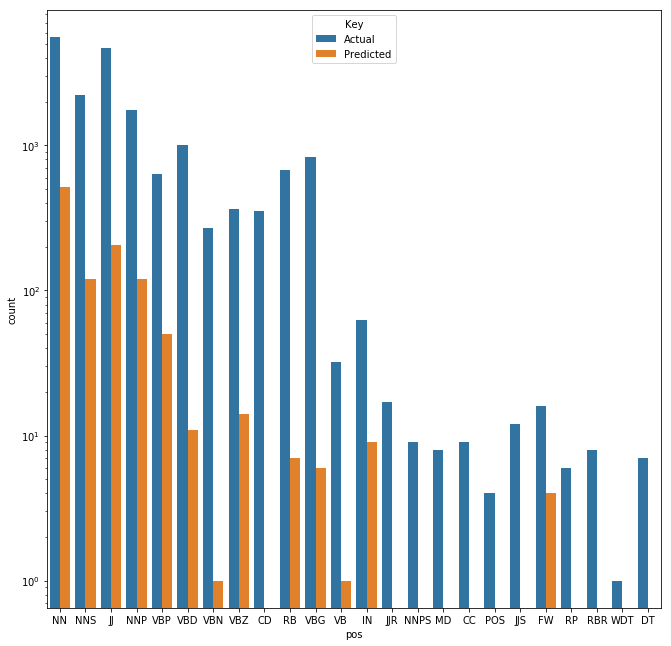

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
DF = pd.concat([df1,df2],keys=['Actual','Predicted'])
plt.figure(figsize = (11,11))
ax=sns.countplot(x="pos", hue="Key", data=DF)
ax.set_yscale('log')

In [41]:
df_predict = pd.DataFrame(index_properties_1['pos'][:24])

In [42]:
df_predict=pd.concat([df_predict,pd.DataFrame(index_properties_2['pos'][:500])])
df_predict=pd.concat([df_predict,pd.DataFrame(index_properties_3['pos'][:500])])
df_predict=pd.concat([df_predict,pd.DataFrame(index_properties_2['pos'][:60])])

In [44]:
df_predict.shape

(1084, 1)

In [45]:
df_predict['Key'] = 'Predicted'
df_actual = pd.DataFrame(indexes['pos'])
df_actual['Key']='Actual'

In [46]:
df_predict.tail()

,pos,Key
1874,NN,Predicted
1835,JJ,Predicted
2216,NN,Predicted
2209,NN,Predicted
2215,NN,Predicted


In [47]:
df_actual.tail()

,pos,Key
1058,NN,Actual
1059,NN,Actual
1060,JJ,Actual
1061,JJ,Actual
1062,JJ,Actual


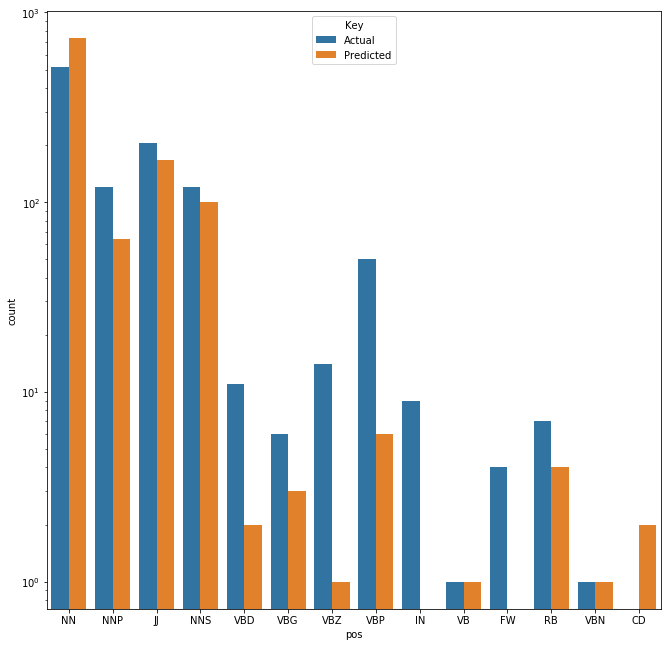

In [49]:
DF = pd.concat([df_actual,df_predict],keys=['Actual','Predicted'])
plt.figure(figsize = (11,11))
ax=sns.countplot(x="pos", hue="Key", data=DF)
ax.set_yscale('log')